### Chaper 16-3 전이학습 (Transfer Learning)

#### 예제#1: 사전학습된 ResNet50 모델로 강아지 인식 프로그램 작성 (p.497)

(1) 라이브러리 import

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

(2)ResNet50 객체 생성

In [5]:
# include_top=True: 분류까지 모두 가져옴
model = ResNet50(weights='imagenet')
# model.summary()

(3) 이미지를 가져와서 학습데이터와 동일한 형태로 변형

In [6]:
img_path = 'dog.jpg'
import matplotlib.pyplot as plt
from PIL import Image

img_array = plt.imread(img_path)
img_array.shape

(194, 259, 3)

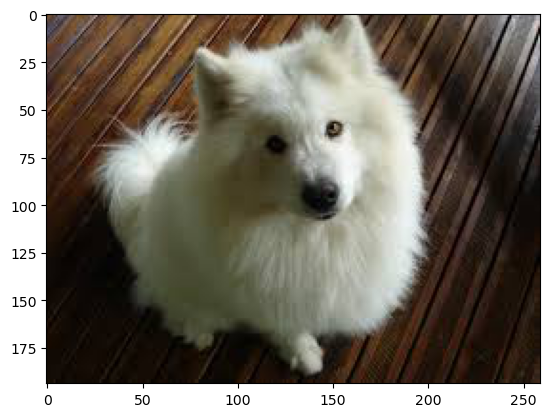

In [7]:
plt.imshow(img_array)
plt.show()

<class 'PIL.Image.Image'>


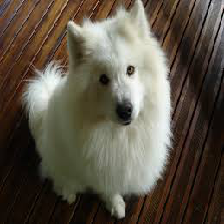

In [15]:
### 크기를 (224, 224, 3)으로 변형하고 ResNet50이 요구하는 전처리 수행
from tensorflow.keras.preprocessing import image

# 이미지 크기를 224로 재지정
img = image.load_img('dog.jpg', target_size=(224, 224))
print(type(img))
img

In [16]:
# numpy array로 변형

x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [17]:
# 0번 축 추가

x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [18]:
# ResNet50의 전처리 과정 수행
x = preprocess_input(x)
x

array([[[[ -69.939    ,  -46.779    ,  -15.68     ],
         [ -70.939    ,  -51.779    ,  -23.68     ],
         [ -62.939003 ,  -50.779    ,  -25.68     ],
         ...,
         [  24.060997 ,    6.2210007,   -1.6800003],
         [  70.061    ,   52.221    ,   44.32     ],
         [  71.061    ,   53.221    ,   45.32     ]],

        [[ -73.939    ,  -54.779    ,  -26.68     ],
         [ -44.939003 ,  -29.779    ,   -2.6800003],
         [ -49.939003 ,  -41.779    ,  -17.68     ],
         ...,
         [  41.060997 ,   22.221    ,   16.32     ],
         [  77.061    ,   58.221    ,   52.32     ],
         [  70.061    ,   51.221    ,   45.32     ]],

        [[ -49.939003 ,  -37.779    ,  -12.68     ],
         [ -43.939003 ,  -34.779    ,  -13.68     ],
         [ -50.939003 ,  -46.779    ,  -27.68     ],
         ...,
         [  53.060997 ,   35.221    ,   30.32     ],
         [  87.061    ,   69.221    ,   64.32     ],
         [  81.061    ,   63.221    ,   58.32     ]],

(4) ResNet50을 이용하여 전처리한 이미지 예측

In [20]:
pred = model.predict(x)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


(1, 1000)

In [21]:
# 1000개 클래스의 softmax 결과이므로 1이 되어야함
pred.sum(axis=1)

array([0.9999999], dtype=float32)

In [ ]:
# 258번 인덱스의 값이 가장 큰 확률
pred.argmax(axis=1)

array([258])

In [23]:
# 258번 예측 확률 0.955
pred[0, 258]

np.float32(0.9553372)

In [24]:
decode_predictions(pred, top=3)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02111889', 'Samoyed', np.float32(0.9553372)),
  ('n02114548', 'white_wolf', np.float32(0.018170344)),
  ('n02112018', 'Pomeranian', np.float32(0.00993766))]]

In [27]:
print(decode_predictions(pred, top=3)[0][0][1], decode_predictions(pred, top=3)[0][0][2] * 100, '%')

Samoyed 95.53372 %


In [28]:
# ImageNet의 1000개의 class 살펴보기
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import tensorflow as tf
import json, urllib.request

# Keras는 ImageNet 클래스 인덱스를 이 URL에서 불러옵니다.
url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
class_index_path = tf.keras.utils.get_file("imagenet_class_index.json", url)

with open(class_index_path) as f:
    class_index = json.load(f)

class_index

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama